In [1]:
# ws01
from sklearn import datasets 
import matplotlib.pyplot as plt
import numpy as np

digits = datasets.load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
digits.images[:2]


array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [7]:
digits.target[:40]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

In [8]:
digits.target.shape

(1797,)

In [9]:
img = digits.images[2]
img.shape

(8, 8)

In [10]:
print(img)

[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


In [11]:
print(np.isnan(digits.images).sum())
np.isnan(digits.data).sum()

0


0

## ws02

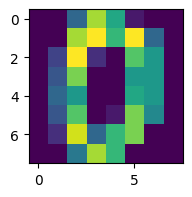

In [12]:
img = digits.images[1796]
img = digits.images[0]

plt.figure(figsize=(2, 2))
plt.imshow(img) 
plt.show()

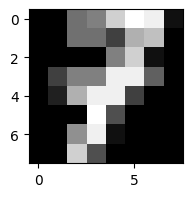

In [13]:
img = digits.images[7]
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

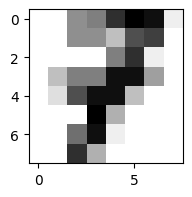

In [14]:
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap=plt.cm.gray_r)
plt.show()

In [15]:
def visual_multi(i):
    '''Plots 15 digits, starting with digit i'''
    nplots = 40
    fig = plt.figure(figsize=(8, 4)) 
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(digits.images[i+j], cmap=plt.cm.gray_r)
        plt.title(digits.target[i+j])
        plt.xticks([]); plt.yticks([])
    plt.show()

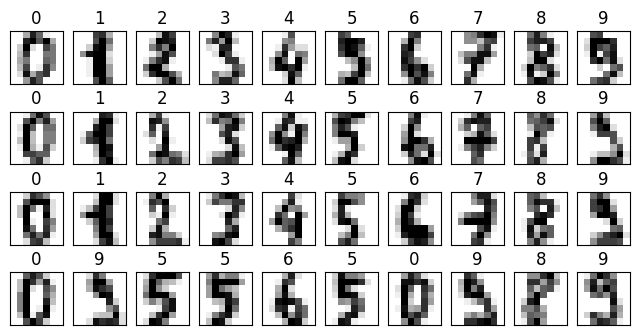

In [16]:
visual_multi(0)

## ws03

In [17]:
n_samples = len(digits.images)  #
n_samples

1797

In [18]:
X = digits.images.reshape((n_samples, -1))
X[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [19]:
y = digits.target
y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=20) # 
X_train.shape , X_test.shape

((1078, 64), (719, 64))

## ws04

In [21]:
from sklearn import svm 

model = svm.SVC(gamma='scale')

In [22]:
model.fit(X_train, y_train)

SVC()

In [23]:
y_pred = model.predict(X_test)
y_pred[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [24]:
y_test[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9819193324061196

In [26]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy Score: 0.9819
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        63
           3       1.00      0.95      0.97        80
           4       1.00      0.99      0.99        75
           5       0.96      0.99      0.97        71
           6       1.00      0.99      0.99        71
           7       0.95      0.99      0.97        80
           8       0.94      1.00      0.97        64
           9       0.97      0.94      0.95        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719

[[63  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 0  0 63  0  0  0  0  0  0  0]
 [ 0  0  0 76  0  1  0  1  2  0]
 [ 0  0  0  0 74  0  0  0  1  0]
 [ 0  0  0  0  0 70  0  0  0  1]
 [ 0  0  0  0  0  1 

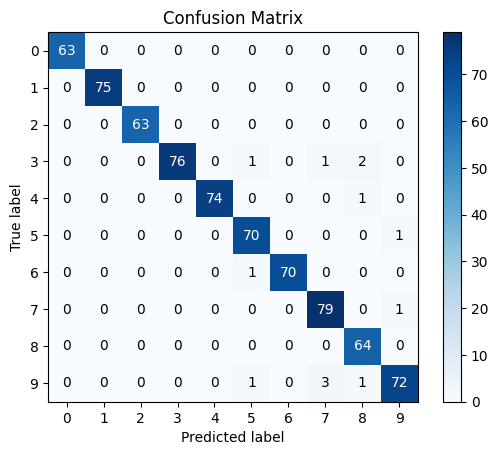

In [27]:
# import matplotlib.pyplot as plt
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.savefig('digit-cm2.png', dpi=120)
plt.show()

## sw05

In [28]:
idx_miss = np.where(y_test != y_pred)
idx_miss

(array([ 98, 111, 268, 338, 351, 427, 434, 449, 470, 523, 562, 638, 657],
       dtype=int64),)

In [29]:
y_test[idx_miss]

array([9, 5, 3, 4, 9, 3, 6, 7, 3, 3, 9, 9, 9])

In [30]:
y_pred[idx_miss]

array([8, 9, 8, 8, 5, 5, 5, 9, 7, 8, 7, 7, 7])

In [31]:
X_test[idx_miss][0]

array([ 0.,  0.,  2., 10., 16., 11.,  1.,  0.,  0.,  0., 13., 13., 10.,
       16.,  8.,  0.,  0.,  4., 14.,  1.,  8., 14.,  1.,  0.,  0.,  4.,
       15., 12., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  7., 14.,  5.,  0.,
        0.,  0.,  1.,  2.,  0., 12.,  5.,  0.,  0.,  0.,  8., 15.,  6.,
       13.,  4.,  0.,  0.,  0.,  0.,  5., 11., 16.,  3.,  0.,  0.])

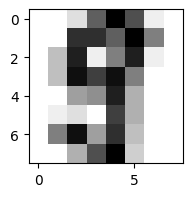

In [41]:
fig = plt.figure(figsize=(2, 2)) # 
plt.imshow(X_test[idx_miss][0].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

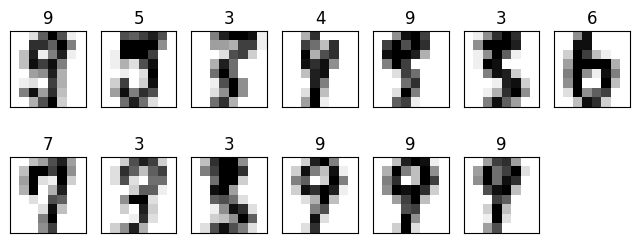

In [39]:
fig = plt.figure(figsize=(8, 3)) 
for j,k in enumerate(idx_miss[0]):

    plt.subplot(2, 7, j+1)
    plt.imshow(X_test[k].reshape(8,8), cmap=plt.cm.gray_r)
    plt.title(y_test[k])
    plt.xticks([])
    plt.yticks([])

plt.show()

## ws06

In [34]:
from sklearn.model_selection import cross_val_score

model = svm.SVC(gamma='scale')

cvs = cross_val_score(model, X, y, cv=10) 
print(cvs.round(4))
cvs.mean().round(4)

[0.9444 0.9889 0.9278 0.9667 0.9833 0.9889 0.9889 0.9944 0.9609 0.9553]


0.97

## ws08

In [46]:
import numpy as np
from PIL import Image, ImageOps

model = svm.SVC(gamma='scale')
model.fit(X, y)

imgfile = 'digit0.png'

img = Image.open(imgfile).convert('L') 
img = ImageOps.invert(img)
img = img.resize((8, 8), Image.LANCZOS) 

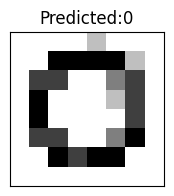

In [47]:
pixel = np.array(img)  # 8x8
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')

my_digit = pixel.reshape(1, -1)  # 1x64
predicted = model.predict(my_digit)

plt.figure(figsize=(2, 2))
plt.imshow(pixel, cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])

plt.show()

In [48]:
pixel
my_digit

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 4, 4, 4, 1, 0, 0, 3, 3, 0, 0, 2,
        3, 0, 0, 4, 0, 0, 0, 1, 3, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0,
        0, 2, 4, 0, 0, 0, 4, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

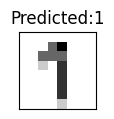

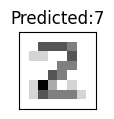

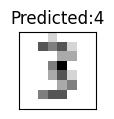

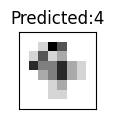

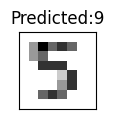

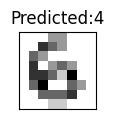

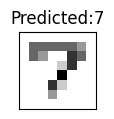

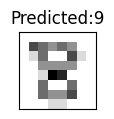

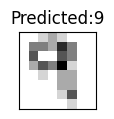

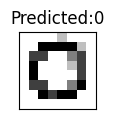

In [53]:

import numpy as np
from PIL import Image, ImageOps

def predict_digit(imgfile):
    img = Image.open(imgfile).convert('L') 
    img = ImageOps.invert(img)
    img = img.resize((8, 8), Image.LANCZOS)  


    pixel = np.array(img)
    pixel = pixel / 255.0 * 16
    pixel = pixel.astype('int')
    
    my_digit = pixel.reshape(1, -1)
    predicted = model.predict(my_digit)
    
    plt.figure(figsize=(1,1))
    plt.imshow(pixel, cmap=plt.cm.gray_r)
    plt.title('Predicted:{}'. format(predicted[0]))
    plt.xticks([])
    plt.yticks([])    
    plt.show()

imgfiles = ['digit1.png','digit2.png','digit3.png','digit4.png','digit5.png',
            'digit6.png','digit7.png','digit8.png','digit9.png','digit0.png']
for i in imgfiles:
    predict_digit(i)

## ws09


In [56]:
from PIL import Image, ImageOps

imgfile = 'digit0.png'
img = Image.open(imgfile).convert('L') 
img = ImageOps.invert(img)
img = img.resize((8, 8), Image.LANCZOS) 

In [57]:
pixel = np.array(img)  # 8x8
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')
pixel

array([[0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 4, 4, 4, 4, 1, 0],
       [0, 3, 3, 0, 0, 2, 3, 0],
       [0, 4, 0, 0, 0, 1, 3, 0],
       [0, 4, 0, 0, 0, 0, 3, 0],
       [0, 3, 3, 0, 0, 2, 4, 0],
       [0, 0, 4, 3, 4, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [58]:
digit_0_001 = pixel.reshape(1, -1)[0]  # 1x64
digit_0_001

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 4, 4, 4, 1, 0, 0, 3, 3, 0, 0, 2,
       3, 0, 0, 4, 0, 0, 0, 1, 3, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0,
       0, 2, 4, 0, 0, 0, 4, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
imgfile = 'digit1.png'
img = Image.open(imgfile).convert('L') # gray
img = ImageOps.invert(img)
img = img.resize((8, 8), Image.LANCZOS)  # should anti resize
pixel = np.array(img)  # 8x8
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')
pixel
digit_1_001 = pixel.reshape(1, -1)[0]  # 1x64
digit_1_001

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 0, 0, 0, 3, 3, 3, 0,
       0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [64]:
imgfile = 'digit2.png'
img = Image.open(imgfile).convert('L') # gray
img = ImageOps.invert(img)
img = img.resize((8, 8), Image.LANCZOS)  # should anti resize
pixel = np.array(img)  # 8x8
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')
pixel
digit_2_001 = pixel.reshape(1, -1)[0]  # 1x64
digit_2_001

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 3, 0, 0, 0, 1, 1, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 1, 6, 2,
       0, 1, 0, 0, 0, 1, 4, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
imgfile = 'digit3.png'
img = Image.open(imgfile).convert('L') # gray
img = ImageOps.invert(img)
img = img.resize((8, 8), Image.LANCZOS)  # should anti resize
pixel = np.array(img)  # 8x8
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')
pixel
digit_3_001 = pixel.reshape(1, -1)[0]  # 1x64
digit_3_001

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 3, 4, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 0, 0, 2, 4, 1, 0, 0, 0, 0, 0, 0,
       2, 3, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
import pandas as pd

df = pd.DataFrame([digit_0_001])
df2 = df.append([digit_1_001])
df3 = df.append([digit_2_001])
df4 = df.append([digit_3_001])
df

AttributeError: 'DataFrame' object has no attribute 'append'

In [69]:
import pandas as pd

# Assume digit_0_001, digit_1_001, digit_2_001, digit_3_001 are numpy arrays

# Create DataFrames from numpy arrays
df = pd.DataFrame([digit_0_001])  # Creating the initial DataFrame

# Convert other arrays to DataFrames
df1 = pd.DataFrame([digit_1_001])
df2 = pd.DataFrame([digit_2_001])
df3 = pd.DataFrame([digit_3_001])

# Concatenate all DataFrames
df_combined = pd.concat([df, df1, df2, df3], ignore_index=True)

print(df_combined)


   0   1   2   3   4   5   6   7   8   9   ...  54  55  56  57  58  59  60  \
0   0   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   1   
2   0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   0   
3   0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   61  62  63  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  

[4 rows x 64 columns]


In [70]:
y = [0,1,2,3]

In [71]:
X = df
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X.shape

(1, 64)